<a href="https://colab.research.google.com/github/doricardo/relacao-dolar-governos-brasil/blob/master/relacao_dolar_governos_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
#plt.rcParams['figure.figsize'] = (14, 8)
#plt.rcParams['font.size'] = 22

In [0]:
if not dolar.empty:
  del dolar

In [0]:
path = '/content/drive/My Drive/Dataframe/dolar/'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, dtype={0: object, 1: object}, sep=';')
    df.columns =['data','codigo','tipo','simbolo','compra','venda','realcompra','realvenda']
    li.append(df)

    dolar = pd.concat(li, axis=0, ignore_index=True)

In [37]:
dolar.describe()

,data,codigo,tipo,simbolo,compra,venda,realcompra,realvenda
count,5112,5112,5112,5112,5112,5112,5112,5112
unique,5112,1,1,1,4434,4425,1,1
top,06112017,220,A,USD,"2,0260","2,0266","1,0000","1,0000"
freq,1,5112,5112,5112,5,6,5112,5112


In [0]:
dolar['data'] = pd.to_datetime(dolar['data'], format='%d%m%Y')
dolar['compra'] = dolar['compra'].replace(',','.', regex=True).astype(float)
dolar['venda'] = dolar['venda'].replace(',','.', regex=True).astype(float)

In [0]:
dolar = dolar.set_index(['data'])

In [0]:
dolar.loc[:,'epoch'] = (dolar.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [0]:
def grafico_periodo(df, inicio, fim):
  periodo = df[(df.index >= inicio) & (df.index <= fim)]  
  plt.title('Período ' + inicio + ' '+ fim)
  periodo['compra'].plot()
  plt.show()
  #sns.regplot('epoch', 'compra', data=periodo)
  
def grafico_regplot(df, inicio, fim):
  periodo = df[(df.index >= inicio) & (df.index <= fim)]  
  sns.regplot('epoch', 'compra', data=periodo)  

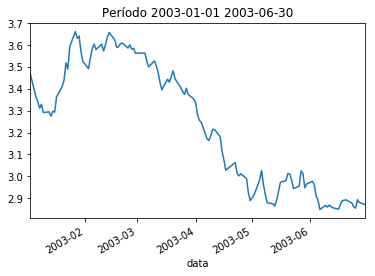

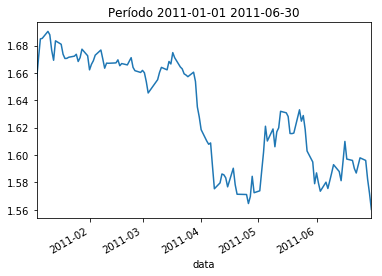

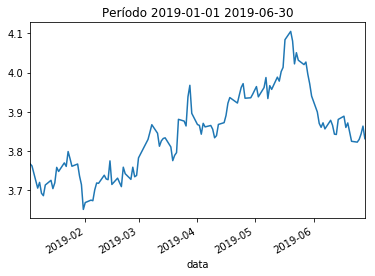

In [50]:
grafico_periodo(dolar, '2003-01-01', '2003-06-30')
grafico_periodo(dolar, '2011-01-01', '2011-06-30')
grafico_periodo(dolar, '2019-01-01', '2019-06-30')

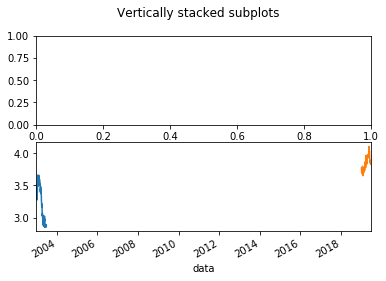

In [51]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')

inicio = '2003-01-01'
fim = '2003-06-30'

periodo = dolar[(dolar.index >= inicio) & (dolar.index <= fim)] 
axs[0] = periodo['compra'].plot()


inicio = '2019-01-01'
fim = '2019-06-30'
periodo1 = dolar[(dolar.index >= inicio) & (dolar.index <= fim)] 
axs[1] = periodo1['compra'].plot()

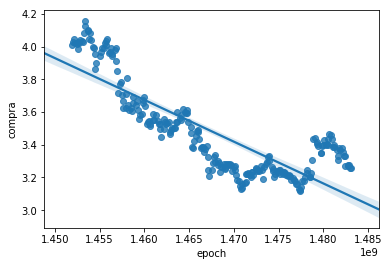

In [0]:
grafico_regplot(dolar, '2016-01-01', '2016-12-31')

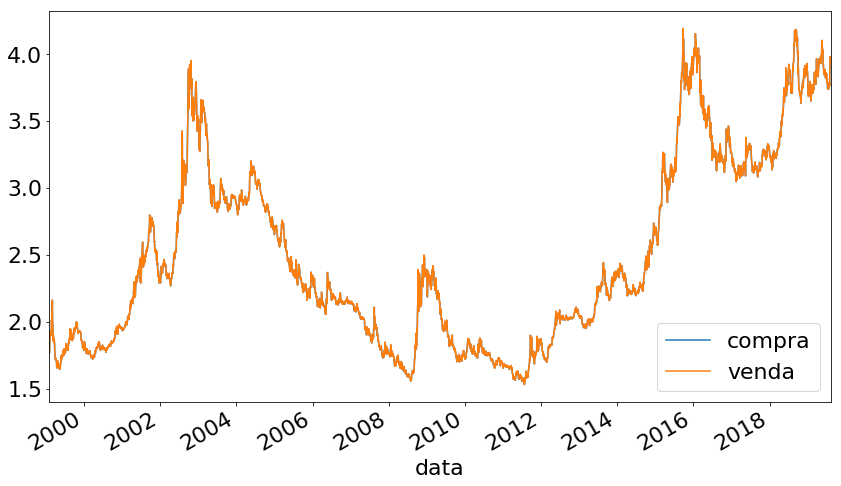

In [0]:
dolar.plot(y=['compra', 'venda'])